# Import Packages

In [48]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy.stats import chi2
import statsmodels as sm
import statsmodels.api as smapi
from scipy.spatial import distance
import scipy.optimize as so
from random import seed
from random import randint

%matplotlib inline

# Read in Data

In [3]:
# Pull Data
data_0 = pd.read_excel('PS4_Data.xlsx',sheet_name= 'DataSet0')
data_1 = pd.read_excel('PS4_Data.xlsx',sheet_name= 'DataSet1')
data_2 = pd.read_excel('PS4_Data.xlsx',sheet_name= 'DataSet2')
data_3 = pd.read_excel('PS4_Data.xlsx',sheet_name= 'DataSet3')

# Column labels
column_names = ['obs','Y','D','X1','X2','Z1','Z2']
data_0.columns = column_names
data_1.columns = column_names
data_2.columns = column_names
data_3.columns = column_names

# Problem 3
## A, B, part of C


DataSet 0:

Part A: Probit Regression
Optimization terminated successfully.
         Current function value: 0.588268
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                      D   No. Observations:                10000
Model:                         Probit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 05 Jun 2020   Pseudo R-squ.:                 0.09027
Time:                        12:03:37   Log-Likelihood:                -5882.7
converged:                       True   LL-Null:                       -6466.4
Covariance Type:            nonrobust   LLR p-value:                8.683e-253
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.2879      0.013     21.572      0.000       0.262   

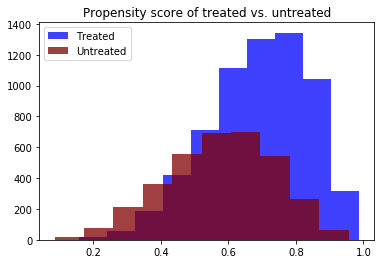

0
1000
2000
3000
4000
5000
6000
7000
8000
9000

DataSet 1:

Part A: Probit Regression
Optimization terminated successfully.
         Current function value: 0.544252
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:                      D   No. Observations:                 1000
Model:                         Probit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Fri, 05 Jun 2020   Pseudo R-squ.:                  0.1804
Time:                        12:05:04   Log-Likelihood:                -544.25
converged:                       True   LL-Null:                       -664.06
Covariance Type:            nonrobust   LLR p-value:                 1.147e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1             0.0436 

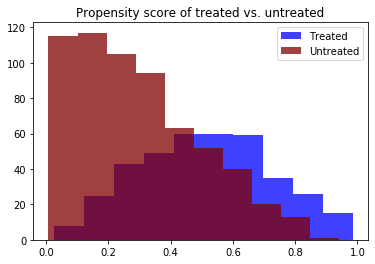

0

DataSet 2:

Part A: Probit Regression
Optimization terminated successfully.
         Current function value: 0.098024
         Iterations 10
                          Probit Regression Results                           
Dep. Variable:                      D   No. Observations:               100000
Model:                         Probit   Df Residuals:                    99996
Method:                           MLE   Df Model:                            3
Date:                Fri, 05 Jun 2020   Pseudo R-squ.:                  0.8269
Time:                        12:05:07   Log-Likelihood:                -9802.4
converged:                       True   LL-Null:                       -56620.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -2.1513      0.022    -97.930      0.000      -2.194

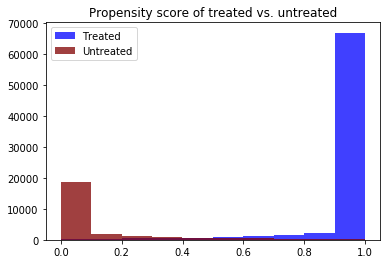

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000

DataSet 3:

Part A: Probit Regression
Optimization terminated successfully.
         Current function value: 0.384732
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                      D   No. Observations:                10000
Model:                         Probit   Df Residuals:                     9996
Method:                           M

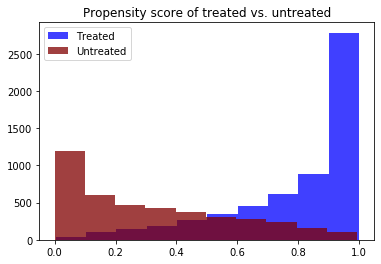

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [122]:
# DataSets 0, 1, 3 are alright...DataSet2 takes a while!
database_list = [data_0, data_1, data_2, data_3]
re_match = "no"
count=0

for data in database_list:
    print('')
    print('DataSet ' + str(count) + ':')
    # Prepare data
    w = data[['X1','X2','Z1','Z2']]
    y = data[['D']]
    
    print('')
    print('Part A: Probit Regression')
    
    # Run probit model and print results
    model = sm.discrete.discrete_model.Probit(y, w)
    results = model.fit()
    print(results.summary())
    
    
    ###plot p-scores for two groups
    print('')
    print('Part B: Histogram')
    
    data['p_score'] = results.predict() #calculate fitted values
    
    fig, ax = plt.subplots()
    plt.hist(data[(data['D']==1)]['p_score'],label='Treated',alpha=0.75, color = "blue")
    plt.hist(data[(data['D']==0)]['p_score'],label='Untreated',alpha=0.75, color = "maroon")
    ax.set_title('Propensity score of treated vs. untreated')
    ax.legend(loc='best')
    plt.savefig('Problem Set 4 Charts/3C DataSet' + str(count) + ' hist.png')
    plt.show()
    
    count = count + 1
    
    # This option allows old runs of matching to be used (i.e. for DataSet2)
    if re_match=="yes":
        ###match and calculate observation TEs
        #calculate covariance matrix inverse for distance (makes code faster)
        Σ = np.cov(np.array(data[['X1','X2','Z1','Z2']]).transpose())
        Σ_inv = np.linalg.inv(Σ)
        data['TE'] = np.nan
        σ_x1, σ_x2, σ_z1, σ_z2 = Σ[0,0]**0.5, Σ[1,1]**0.5, Σ[2,2]**0.5, Σ[3,3]**0.5

        #convert panda to array to speed up loop
        V_1 = data[data['D'] == 1]
        V_1 = np.array(V_1[['X1','X2','Z1','Z2']])
        V_0 = data[data['D'] == 0]
        V_0 = np.array(V_0[['X1','X2','Z1','Z2']])
        V = np.array(data[['X1','X2','Z1','Z2']])
        D = np.array(data[['D']])
        factor = 0.5

        for i in range(len(data)):
            
            # Tracker while running
            if i%1000==0:
                print(str(i))

            #extract element
            v_1 = V[i]#np.array(data[['X1','X2','Z1','Z2']].iloc[i])
            d_id = D[i][0]

            # Only search over opposite Treated vs. Untreated
            '''This step is a quick heuristic to cut down on the
            search time. We essentially use a simpler proxy for the
            whole Mahalanobis metric to rule out obs which will probably 
            not match'''
            if d_id == 1:
                V_compare = [v for v in V_0 if abs(v[0]-v_1[0])/σ_x1<factor and abs(v[1]-v_1[1])/σ_x2<factor and abs(v[2]-v_1[2])/σ_z1<factor and abs(v[3]-v_1[3])/σ_z2<factor]
            else:
                V_compare = [v for v in V_1 if abs(v[0]-v_1[0])/σ_x1<factor and abs(v[1]-v_1[1])/σ_x2<factor and abs(v[2]-v_1[2])/σ_z1<factor and abs(v[3]-v_1[3])/σ_z2<factor]

            #look for nearest neighbour
            current_best = 99999999
            nn_loc = 0

            # Search over the respective set
            for v_2 in V_compare:
                if distance.mahalanobis(v_1, v_2, Σ_inv)<current_best and np.where(V == v_2)[0][0]!=i:
                    nn_loc = np.where(V == v_2)[0][0]
                    current_best = distance.mahalanobis(v_1, v_2, Σ_inv)

            data.iloc[i, data.columns.get_loc('TE')] = (2*data.iloc[i, data.columns.get_loc('D')]-1)*(data.iloc[i, data.columns.get_loc('Y')]-data.iloc[nn_loc, data.columns.get_loc('Y')])

# Function Setup for Estimation

In [123]:
'''This is a general function which takes data, estimator type,
and a few other specifications, and returns the TE as a function
of the propensity score'''
def estimator(data, estimator = 'ATE',p_score = 'p_score',TE = 'TE', D = 'D', p_l = 0, p_u = 1, bins = 20, graph = "yes", return_values = "no"):

    # For Average Marginal TE
    if estimator == 'AMTE':
        df = data[(data[p_score]<=p_u)]
        df = df[df[p_score] >= p_l][TE]
        AMTE = np.mean(df)
        values = np.array([AMTE,AMTE])
        p_values = np.array([p_l,p_u])
        return values, p_values
    
    # Create prop score domain
    p_values = np.linspace(p_l, p_u, bins + 1)
    values = np.zeros(bins+1)
    
    # Get appropriate data subset
    if estimator == 'TOT':
        data = data[data[D]==1]
    if estimator == 'TUT':
        data = data[data[D]==0]
        
    # Get binned results
    for i in range(bins):
        p = p_values[i]
        df = data[(data[p_score]<=p + 1/(2*bins))]
        df = df[df[p_score] >= p - 1/(2*bins)][TE]
        values[i] = np.mean(df)
    
    #drop nan values
    p_values = np.delete(p_values, np.where(np.isnan(values)))
    values = np.delete(values, np.where(np.isnan(values)))
    
    # Plot
    if graph == "yes":
        fig, ax = plt.subplots()
        ax.plot(p_values, values, linewidth=2, alpha=0.6, label=estimator)
        ax.legend(loc='best')
        ax.set_title(estimator + ' vs propensity score')
        ax.set_xlabel('Propensity Score')
        plt.show()
    
    # Values
    if return_values == "yes":
        return values, p_values



## C Plots


DataSet0:


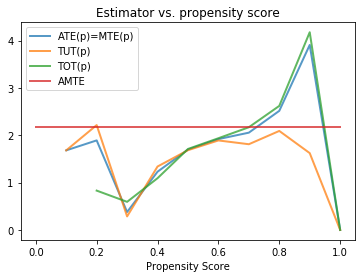


DataSet1:


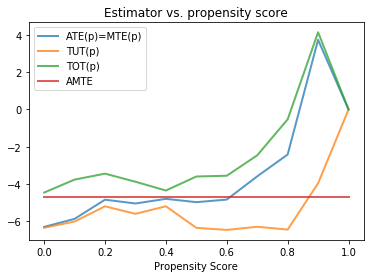


DataSet2:


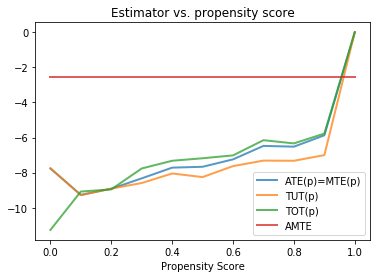


DataSet3:


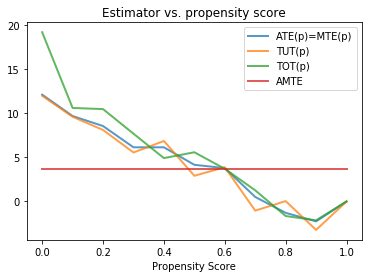

In [124]:
# Control the granularity of the TE plots
bin_size = 10

# Prop score bounds
p_l = 0
p_u = 1

count = 0
for data in database_list:
    # Get the TEs
    ATE = estimator(data, estimator = 'ATE', p_l = p_l, p_u = p_u, bins = bin_size, graph = 'no', return_values = 'yes')
    TUT = estimator(data, estimator = 'TUT', p_l = p_l, p_u = p_u, bins = bin_size, graph = 'no', return_values = 'yes')
    TOT = estimator(data, estimator = 'TOT', p_l = p_l, p_u = p_u, bins = bin_size, graph = 'no', return_values = 'yes')
    AMTE = estimator(data, estimator = 'AMTE', p_l = p_l, p_u = p_u, graph = 'no', return_values = 'yes')
    
    # Plot'em!
    print('')
    print('DataSet' + str(count) + ':')
    fig, ax = plt.subplots()
    ax.plot(ATE[1], ATE[0], linewidth=2, alpha=0.75, label='ATE(p)=MTE(p)')
    ax.plot(TUT[1], TUT[0], linewidth=2, alpha=0.75, label='TUT(p)')
    ax.plot(TOT[1], TOT[0], linewidth=2, alpha=0.75, label='TOT(p)')
    ax.plot(AMTE[1], AMTE[0], linewidth=2, alpha=0.75, label='AMTE')
    ax.legend(loc='best')
    ax.set_title('Estimator vs. propensity score')
    ax.set_xlabel('Propensity Score')
    plt.savefig('Problem Set 4 Charts/3C_DataSet' + str(count) + '_est_pscore.png')
    plt.show()
    
    # For labels
    count = count + 1

## D


DataSet0:


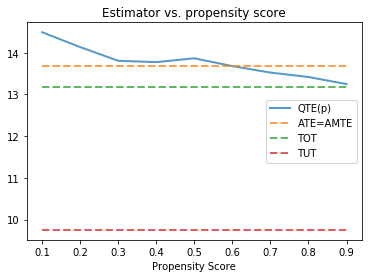


DataSet1:


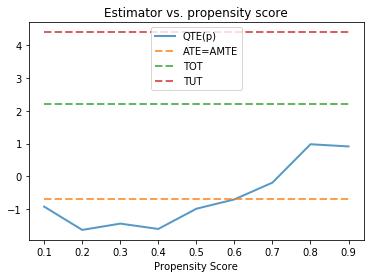


DataSet2:


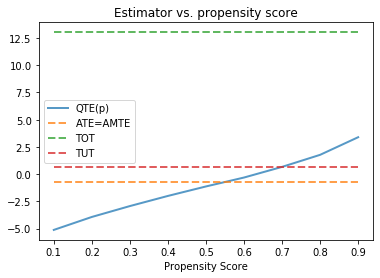


DataSet3:


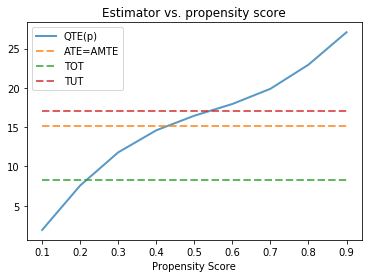

In [125]:
count = 0
for data in database_list:
    
    print('')
    print('DataSet' + str(count) + ':')
    
    # ATE regression
    X = data['p_score']
    X = smapi.add_constant(X)
    y = data['Y']
    model = smapi.OLS(y, X)
    results = model.fit()
    #print(results.summary())
    ATE_est = results.params[1]
    
    #Quantile Regression Estimates
    q_l = 0.1
    q_u = 0.9
    steps = 9
    model = sm.regression.quantile_regression.QuantReg(y,X)
    q_est = np.zeros(steps)
    quantile = np.linspace(q_l, q_u, steps)
    for i in range(len(q_est)):
        results = model.fit(q = quantile[i])
        q_est[i] = results.params[1]

    # TUT reg
    df = data[(data['D'] == 0)]
    X = df['p_score']
    X = smapi.add_constant(X)
    y = df['Y']
    model = smapi.OLS(y, X)
    results = model.fit()
    #print(results.summary())
    TUT_est = results.params[1]

    # TOT reg
    df = data[(data['D'] == 1)]
    X = df['p_score']
    X = smapi.add_constant(X)
    y = df['Y']
    model = smapi.OLS(y, X)
    results = model.fit()
    #print(results.summary())
    TOT_est = results.params[1]


    # Plot for quantile reg
    fig, ax = plt.subplots()
    ax.plot(quantile, q_est, linewidth=2, alpha=0.75, label='QTE(p)')
    ax.plot(np.array([q_l,q_u]), np.array([ATE_est,ATE_est]), linewidth=2, linestyle = "dashed", alpha=0.75, label='ATE=AMTE')
    ax.plot(np.array([q_l,q_u]), np.array([TOT_est,TOT_est]), linewidth=2, linestyle = "dashed", alpha=0.75, label='TOT')
    ax.plot(np.array([q_l,q_u]), np.array([TUT_est,TUT_est]), linewidth=2, linestyle = "dashed", alpha=0.75, label='TUT')
    ax.legend(loc='best')
    ax.set_title('Estimator vs. propensity score')
    ax.set_xlabel('Propensity Score')
    plt.savefig('Problem Set 4 Charts/3D_DataSet' + str(count) + '_qreg_plot.png')
    plt.show()
    
    count = count + 1

## F


DataSet0:


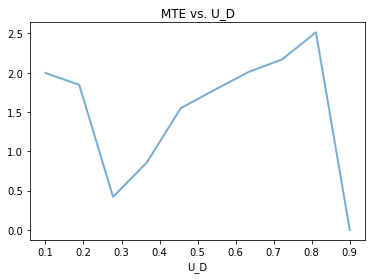

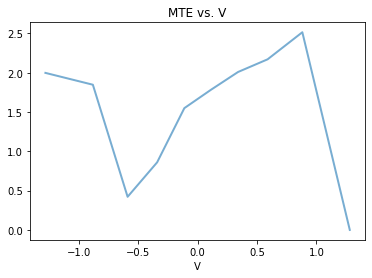


DataSet1:


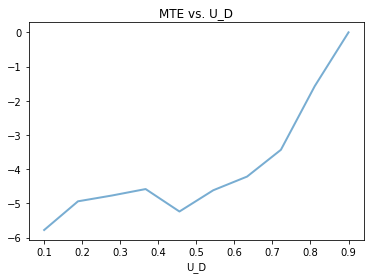

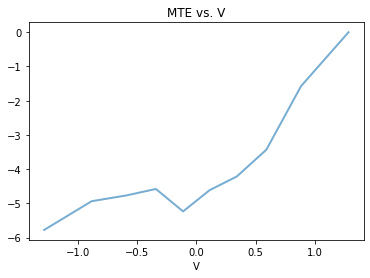


DataSet2:


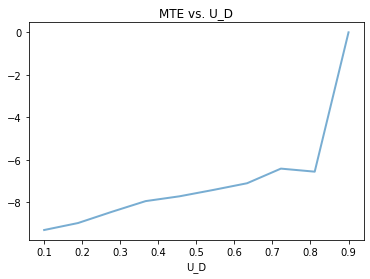

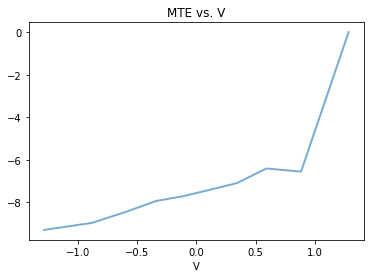


DataSet3:


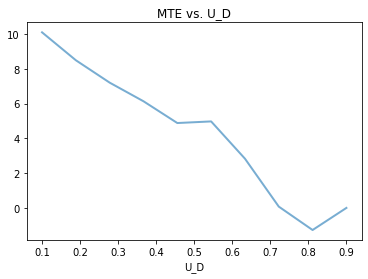

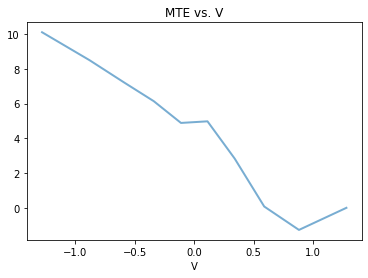

In [135]:
bin_no = 9
p_l = 0.1
p_u = 0.9

count = 0
for data in database_list:
    
    print('')
    print('DataSet' + str(count) + ':')
    
    # First we do the "standard" MTE(u)
    MTE = estimator(data, estimator = 'ATE', p_l = 0.1, p_u = 0.9, bins = bin_no, graph = 'no', return_values = 'yes')
    fig, ax = plt.subplots()
    ax.plot(MTE[1], MTE[0], linewidth=2, alpha=0.6, label='MTE(p)')
    ax.set_title('MTE vs. U_D')
    ax.set_xlabel('U_D')
    plt.savefig('Problem Set 4 Charts/3F_DataSet' + str(count) + '_MTE(U_D)_plot.png')
    plt.show()
    
    # We use Phi^{-1}*u = v, if we normalize sigma_V = 1
    MTE_x_2 = [norm.ppf(p) for p in MTE[1]]
    fig, ax = plt.subplots()
    ax.plot(MTE_x_2, MTE[0], linewidth=2, alpha=0.6, label='MTE(V)')
    ax.set_title('MTE vs. V')
    ax.set_xlabel('V')
    plt.savefig('Problem Set 4 Charts/3F_DataSet' + str(count) + '_MTE(V)_plot.png')
    plt.show()
    
    count = count + 1

# 5
## (Completed before 4, which is below)
## C, part of D


DataSet0:
Regression on treated
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.890
Method:                 Least Squares   F-statistic:                          1.756e+04
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:23:48   Log-Likelihood:                         -16229.
No. Observations:                6513   AIC:                                  3.246e+04
Df Residuals:                    6510   BIC:                                  3.248e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

/Users/chaseabram/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
/Users/chaseabram/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


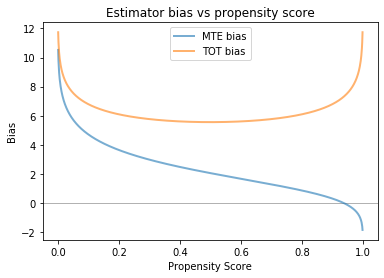


DataSet1:
Regression on treated
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.255
Model:                            OLS   Adj. R-squared (uncentered):              0.249
Method:                 Least Squares   F-statistic:                              43.07
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                    5.90e-24
Time:                        15:23:50   Log-Likelihood:                         -933.68
No. Observations:                 380   AIC:                                      1873.
Df Residuals:                     377   BIC:                                      1885.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

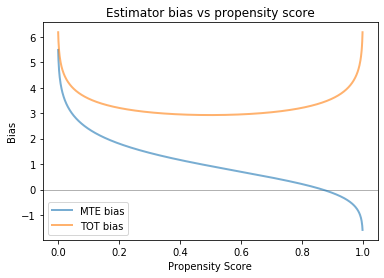


DataSet2:
Regression on treated
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.859
Method:                 Least Squares   F-statistic:                          1.514e+05
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:23:52   Log-Likelihood:                     -1.9305e+05
No. Observations:               74645   AIC:                                  3.861e+05
Df Residuals:                   74642   BIC:                                  3.861e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

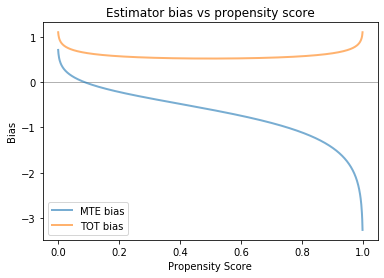


DataSet3:
Regression on treated
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          1.103e+04
Date:                Fri, 05 Jun 2020   Prob (F-statistic):                        0.00
Time:                        15:23:57   Log-Likelihood:                         -20505.
No. Observations:                5836   AIC:                                  4.102e+04
Df Residuals:                    5833   BIC:                                  4.104e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
--------

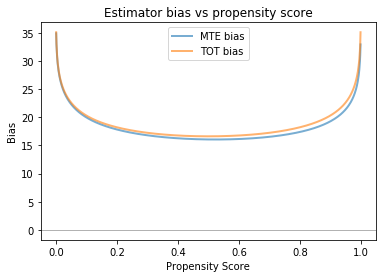

In [127]:
count = 0

for data in database_list:
    
    print('')
    print('DataSet' + str(count) + ':')
    
    #create bias regression variable
    df = data
    df['cntr_f_v_1'] = norm.pdf(norm.ppf(df['p_score']))/df['p_score']
    df['cntr_f_v_0'] = norm.pdf(norm.ppf(df['p_score']))/(1-df['p_score'])
    
    #Regression on treated
    print('Regression on treated')
    df_1 = df[df['D']==1]
    X = df_1[['X1','X2','cntr_f_v_1']]
    #X = smapi.add_constant(X) (reminder to not add the constant)
    y = df_1['Y']
    model = smapi.OLS(y, X)
    results = model.fit()
    print(results.summary())
    β_11, β_12, ζ_1 = results.params

    #Regression on untreated
    print('Regression on untreated')
    df_0 = df[df['D']==0]
    X = df_0[['X1','X2','cntr_f_v_0']]
    #X = smapi.add_constant(X) (reminder to not add the constant)
    y = df_0['Y']
    model = smapi.OLS(y, X)
    results = model.fit()
    print(results.summary())
    β_01, β_02, ζ_0 = results.params
    
    #add estimates to dataframe to evaluate parameters of interest
    df['β_11'] = β_11
    df['β_12'] = β_12
    df['ζ_1'] = ζ_1
    df['β_01'] = β_01
    df['β_02'] = β_02
    df['ζ_0'] = ζ_0
          
    #evaluate parameter value at each point,
    df['ATE'] = df['β_11']*df['X1'] + df['β_12']*df['X2'] - df['β_01']*df['X1'] - df['β_02']*df['X2']
    df['MTE'] = df['β_11']*df['X1'] + df['β_12']*df['X2'] - df['β_01']*df['X1'] - df['β_02']*df['X2'] - (df['ζ_1'] + df['ζ_0'])*norm.ppf(df['p_score'])
    df['TOT'] = df['β_11']*df['X1'] + df['β_12']*df['X2'] - df['β_01']*df['X1'] - df['β_02']*df['X2'] + (df['ζ_1'] + df['ζ_0'])*df['cntr_f_v_1']
    count = count + 1
    
    p_values = np.linspace(0, 1, 1000)
    #Bias expressions from NBER working paper appendix by Heckman and Navarro-Lozano
    MTE_bias = [(ζ_0*p + ζ_1*(1-p))*norm.pdf(norm.ppf(1-p))/(p*(1-p)) - norm.ppf(1-p)*(ζ_1 - ζ_0) for p in p_values]
    TOT_bias = [ζ_0*norm.pdf(norm.ppf(1-p))/(p*(1-p)) for p in p_values]
    
    # Plot
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='gray',alpha=0.6, linewidth=1)
    ax.plot(p_values, MTE_bias, linewidth=2, alpha=0.6, label='MTE bias')
    ax.plot(p_values, TOT_bias, linewidth=2, alpha=0.6, label='TOT bias')
    ax.legend(loc='best')
    ax.set_title('Estimator bias vs propensity score')
    ax.set_xlabel('Propensity Score')
    ax.set_ylabel('Bias')
    plt.savefig('Problem Set 4 Charts/5C_DataSet' + str(count) + '_bias_plot.png')
    plt.show()

## D (LIV), F

Optimization terminated successfully.
         Current function value: 0.588268
         Iterations 5
0.04362345955896896


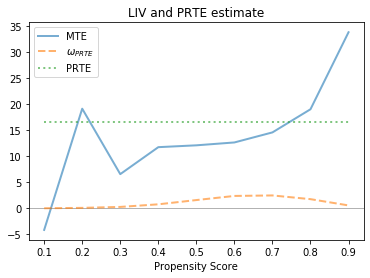

Optimization terminated successfully.
         Current function value: 0.544252
         Iterations 5
0.016188332541845873


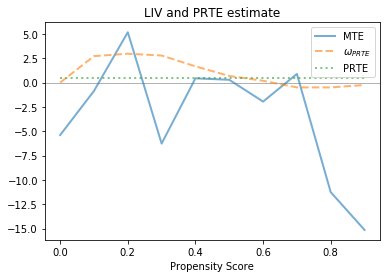

Optimization terminated successfully.
         Current function value: 0.098024
         Iterations 10
-0.0234207587840215


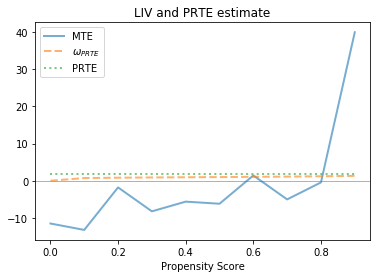

Optimization terminated successfully.
         Current function value: 0.384732
         Iterations 6
-0.00011939394695004157


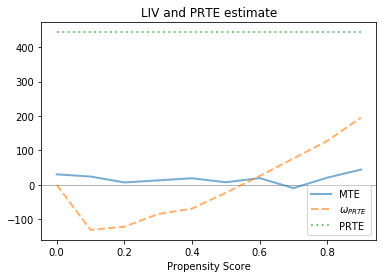

In [128]:
count = 0

for data in database_list:
    
    points = 11
    p_values = np.linspace(0, 1, points)
    
    #Find E[Y|P(X,P)=p]
    expected_value = np.zeros(len(p_values))
    
    # mean within bins
    for i in range(len(p_values)):
        p = p_values[i]
        df = data[data['p_score']<=p + 1/(2*points)]
        df = df[df['p_score'] >= p - 1/(2*points)]['Y']
        expected_value[i] = np.mean(df)

    #drop NaN values
    p_values = np.delete(p_values, np.where(np.isnan(expected_value)))
    expected_value = np.delete(expected_value, np.where(np.isnan(expected_value)))
    
    #Calculate LIV
    LIV = np.empty(len(p_values))
    LIV[:] = np.NaN
    
    # Slope calculation (discrete derivative)
    for i in range(len(p_values)-1):
        LIV[i] = (expected_value[i+1] - expected_value[i])/(p_values[i+1]-p_values[i])
        
    #drop nan values
    p_values = np.delete(p_values, np.where(np.isnan(LIV)))
    LIV = np.delete(LIV, np.where(np.isnan(LIV)))
    
    # new policy: 10% decrease in each covariate of Z
    '''The idea is that we can use the same MTE, since all TE
    are just a weighting of MTE. So we just need the weights.'''
    
    # generate counterfactual Z
    df = data
    df['Z1_new'] = df['Z1']*0.9
    df['Z2_new'] = df['Z2']*0.9
    
    ###prepare data
    w = data[['X1','X2','Z1','Z2']]
    w_new = data[['X1','X2','Z1_new','Z2_new']]
    y = data[['D']]
    
    ###run probit model and print results
    model = sm.discrete.discrete_model.Probit(y, w)
    results = model.fit()
    p_score_new =  np.array(results.predict(w_new))
    p_score = np.array(df['p_score'])
    
    #define cdf for p_scores
    F_p = lambda u : len([p for p in p_score if p <= u])/len(p_score)
    F_p_new = lambda u : len([p for p in p_score_new if p <= u])/len(p_score_new)

    #calculate expectation difference between the two p
    exp_d = np.mean(p_score_new) - np.mean(p_score)
    print(exp_d)
    #calculate PRTE weight (from lecture slides and previous pset)
    ω_PRTE = [F_p(u) - F_p_new(u) for u in p_values]/(exp_d)
    PRTE = np.dot(LIV,ω_PRTE)/len(LIV)

    # Plot
    fig, ax = plt.subplots()
    ax.axhline(y=0, color='gray',alpha=0.6, linewidth=1)
    ax.plot(p_values, LIV, linewidth=2, alpha=0.6, label='MTE')
    ax.plot(p_values, ω_PRTE, linewidth=2, alpha=0.6, linestyle = 'dashed', label='$\omega_{PRTE}$')
    ax.plot([p_values[0],p_values[-1]], [PRTE,PRTE], linewidth=2, linestyle = 'dotted', alpha=0.6, label='PRTE')
    ax.set_title('LIV and PRTE estimate')
    ax.set_xlabel('Propensity Score')
    ax.legend(loc='best')
    plt.savefig('Problem Set 4 Charts/5C_DataSet' + str(count) + '_LIV_plot.png')
    plt.show()
    
    count = count + 1



# Problem 4
## D (calculation)

In [133]:
# Safety so that process is not accidentally run again
run_again = False

'''This parameter is a normalization
which helps prevent the optimization routine
from hitting divide by zero of log(0) errors
due to numerical approximation.'''
scale = 1000

# For computationally feasible bootstrapping, a proxy of the true MLE problem is solved
# (more details below)
# Number of observations to use in proxy problem
num_obs = 50
# Selection of observations
picks = [randint(0, len(data['Y']) - 1) for p in range(0, num_obs)]

'''Given data, this function computes a proxy of the
NEGATIVE of the log-likelihood. The proxy is done by
selecting a subset of the observations and computing the
log-likelihood for those data. This approach is unbiased,
and with bootstrapping it is also consistent. The negative 
is so that we may use the standard minimization routine for 
maximization. 
params = beta_11, beta_12, beta_01, beta_02, gamma_1, gamma_2'''
def royll(params,Y,D,X1,X2,Z1,Z2, picks=picks):
    # Keep track of log-likelihood added/subtracted by each observation
    llsum = 0
#     print("called")
    for i in picks:
        # contribution to LL from each observation in picks
        llsum += D[i]*np.log(norm.pdf((Y[i] - X1[i]*params[0] - X2[i]*params[1])/scale)* \
                            norm.cdf((Y[i] - X1[i]*params[2] - X2[i]*params[3] \
                                      - Z1[i]*params[4] - Z2[i]*params[5])/scale)) \
            + (1 - D[i])*np.log(norm.pdf((Y[i] - X1[i]*params[2] - X2[i]*params[3])/scale)* \
                            (1 - norm.cdf((-Y[i] + X1[i]*params[0] + X2[i]*params[1] \
                                      - Z1[i]*params[4] - Z2[i]*params[5])/scale)))
    
    # Return the negative of the LL, so that we can minimize it
    return -1/num_obs*llsum


'''The problem as given is computationally large. The idea here is to run
bootstrapped MLE estimates in order to find standard errors. However,
in order to keep runtime reasonable, the number of bootstrap trials is
kept low. '''

# Number of bootstraps
bootstraps = 10
# Initialize output of parameter estimates from bootstraps
outputs = np.zeros((4, bootstraps, 6))
# DataSet counter
count = 0
# Maintain results across runs
seed(23)

if run_again:
    for data in database_list:
        # Generate each bootstrap estimate
        for i in range(0,bootstraps):
            # Generate picks of observations to use in MLE
            picks = [randint(0, len(data['Y']) - 1) for p in range(0, num_obs)]
            # Generate Optimizer object
            output = so.minimize(royll, [1,1,1,1,1,1], 
                                            args = (data['Y'], data['D'], 
                                                        data['X1'], data['X2'], 
                                                        data['Z1'], data['Z2'], 
                                                   picks), 
                                            method = 'Nelder-Mead', 
                                            options={'disp': True, 'adaptive': True})
            # Get estimates
            outputs[count][i] = output.x
            # Update on progress
            print("DataSet" + str(count), ", bootstrap " + str(i), "complete")
        count += 1

DataSet0 , bootstrap 0 complete
DataSet0 , bootstrap 1 complete
DataSet0 , bootstrap 2 complete
DataSet0 , bootstrap 3 complete
DataSet0 , bootstrap 4 complete
DataSet0 , bootstrap 5 complete
DataSet0 , bootstrap 6 complete
DataSet0 , bootstrap 7 complete
DataSet0 , bootstrap 8 complete
DataSet0 , bootstrap 9 complete
DataSet1 , bootstrap 0 complete
DataSet1 , bootstrap 1 complete
DataSet1 , bootstrap 2 complete
DataSet1 , bootstrap 3 complete
DataSet1 , bootstrap 4 complete
DataSet1 , bootstrap 5 complete
DataSet1 , bootstrap 6 complete
DataSet1 , bootstrap 7 complete
DataSet1 , bootstrap 8 complete
DataSet1 , bootstrap 9 complete
DataSet2 , bootstrap 0 complete
DataSet2 , bootstrap 1 complete
DataSet2 , bootstrap 2 complete
DataSet2 , bootstrap 3 complete
DataSet2 , bootstrap 4 complete
DataSet2 , bootstrap 5 complete
DataSet2 , bootstrap 6 complete
DataSet2 , bootstrap 7 complete
DataSet2 , bootstrap 8 complete
DataSet2 , bootstrap 9 complete
Optimization terminated successfully.
  

## D (display estimates and standard errors)

In [146]:
count = 0

# Output estimates and standard errors (normalized by first entry)
for data in database_list:
    this_mean = np.mean(outputs[count], axis = 1)
    this_mean = this_mean/this_mean[0]
    print("DataSet" + str(count) + " estimates: ", this_mean)
    this_sd = np.std(outputs[count], axis = 1)
    this_sd = this_sd/this_sd[0]
    print("DataSet" + str(count) + " se: ", this_sd)
    
    # differences in beta terms used for estimating TEs
    beta1 = this_mean[0] - this_mean[2]
    beta2 = this_mean[1] - this_mean[3]
    
    # used for standard errors of TEs
    sd1 = np.sqrt(this_sd[0]**2 + this_sd[2]**2)
    sd2 = np.sqrt(this_sd[1]**2 + this_sd[3]**2)
    
    # ATE = AMTE
    df = data
    print("DataSet" + str(count), " ATE = AMTE: ", np.mean(df['X1'])*beta1 - np.mean(df['X2'])*beta2)
    print("DataSet" + str(count), " ATE(se): ", np.mean(df['X1'])*sd1 + np.mean(df['X2'])*sd2)
    
    # TOT
    df = data[(data['D'] == 1)]
    print("DataSet" + str(count), " TOT: ", np.mean(df['X1'])*beta1 - np.mean(df['X2'])*beta2)
    print("DataSet" + str(count), " TOT(se): ", np.mean(df['X1'])*sd1 + np.mean(df['X2'])*sd2)
    
    # TUT
    df = data[(data['D'] == 0)]
    print("DataSet" + str(count), " TUT: ", np.mean(df['X1'])*beta1 - np.mean(df['X2'])*beta2)
    print("DataSet" + str(count), " TUT(se): ", np.mean(df['X1'])*sd1 + np.mean(df['X2'])*sd2)
    
    count += 1

DataSet0 estimates:  [1.         0.54680117 0.7847084  0.46939649 0.36022567 0.76040771
 0.61685712 1.07725773 0.76429198 0.48121757]
DataSet0 se:  [1.         0.66347893 0.92514971 0.59352792 0.77227719 0.78592917
 1.00433418 1.11126653 1.1327044  1.76036503]
DataSet0  ATE = AMTE:  0.11970577186024284
DataSet0  ATE(se):  6.2647522678446315
DataSet0  TOT:  0.13998258929831192
DataSet0  TOT(se):  6.589300188564032
DataSet0  TUT:  0.0818328404079553
DataSet0  TUT(se):  5.658563392695399
DataSet1 estimates:  [  1.         -13.44934853  -7.14591861  -0.84013077   0.39984321
   4.02047886   0.60968161   0.32795814   2.48565595   1.29544518]
DataSet1 se:  [1.         6.23196986 5.58522823 2.44460204 0.55114384 1.11344109
 0.51772876 1.11355927 0.98733058 2.42900067]
DataSet1  ATE = AMTE:  25.03216812402204
DataSet1  ATE(se):  13.289733883788346
DataSet1  TOT:  26.623321171646744
DataSet1  TOT(se):  14.134216261434354
DataSet1  TUT:  24.05694528838108
DataSet1  TUT(se):  12.772147910392396
Da